In [1]:
# Load helper file
%run helper_file_1.0.ipynb

The number of bitstrings is: 1024
The counts are: {'000': 545, '111': 479}


In [2]:
# Import the transpiler passes object
from qiskit.transpiler import passes
# List out all the passes available
print(dir(passes))


['ALAPSchedule', 'ALAPScheduleAnalysis', 'AQCSynthesisPlugin', 'ASAPSchedule', 'ASAPScheduleAnalysis', 'AlignMeasures', 'ApplyLayout', 'BarrierBeforeFinalMeasurements', 'BasicSwap', 'BasisTranslator', 'CSPLayout', 'CXCancellation', 'CheckGateDirection', 'CheckMap', 'Collect1qRuns', 'Collect2qBlocks', 'CollectCliffords', 'CollectLinearFunctions', 'CollectMultiQBlocks', 'CommutationAnalysis', 'CommutativeCancellation', 'CommutativeInverseCancellation', 'Commuting2qGateRouter', 'ConsolidateBlocks', 'ConstrainedReschedule', 'ContainsInstruction', 'ConvertConditionsToIfOps', 'CountOps', 'CountOpsLongestPath', 'DAGFixedPoint', 'DAGLongestPath', 'Decompose', 'DenseLayout', 'Depth', 'DynamicalDecoupling', 'EchoRZXWeylDecomposition', 'ElidePermutations', 'EnlargeWithAncilla', 'Error', 'FilterOpNodes', 'FixedPoint', 'FullAncillaAllocation', 'GateDirection', 'GatesInBasis', 'HLSConfig', 'HighLevelSynthesis', 'HoareOptimizer', 'InstructionDurationCheck', 'InverseCancellation', 'Layout2qDistance', 

In [3]:
# Get list of backends:
service.backends()

[<IBMBackend('ibm_nazca')>,
 <IBMBackend('test_eagle_us-east')>,
 <IBMBackend('ibm_brisbane')>,
 <IBMBackend('ibm_sherbrooke')>,
 <IBMBackend('ibm_kyiv')>]

In [4]:
# Get the backend device: ibm_brisbane
backend_brisbane = service.get_backend('ibm_brisbane')
# Get the backend device: ibm_nazca
backend_nazca = service.get_backend('ibm_nazca')

# NOTE: If the above systems are not available, choose any two systems you have available to you when running this cell as devices may have upgraded since the time of this writing.

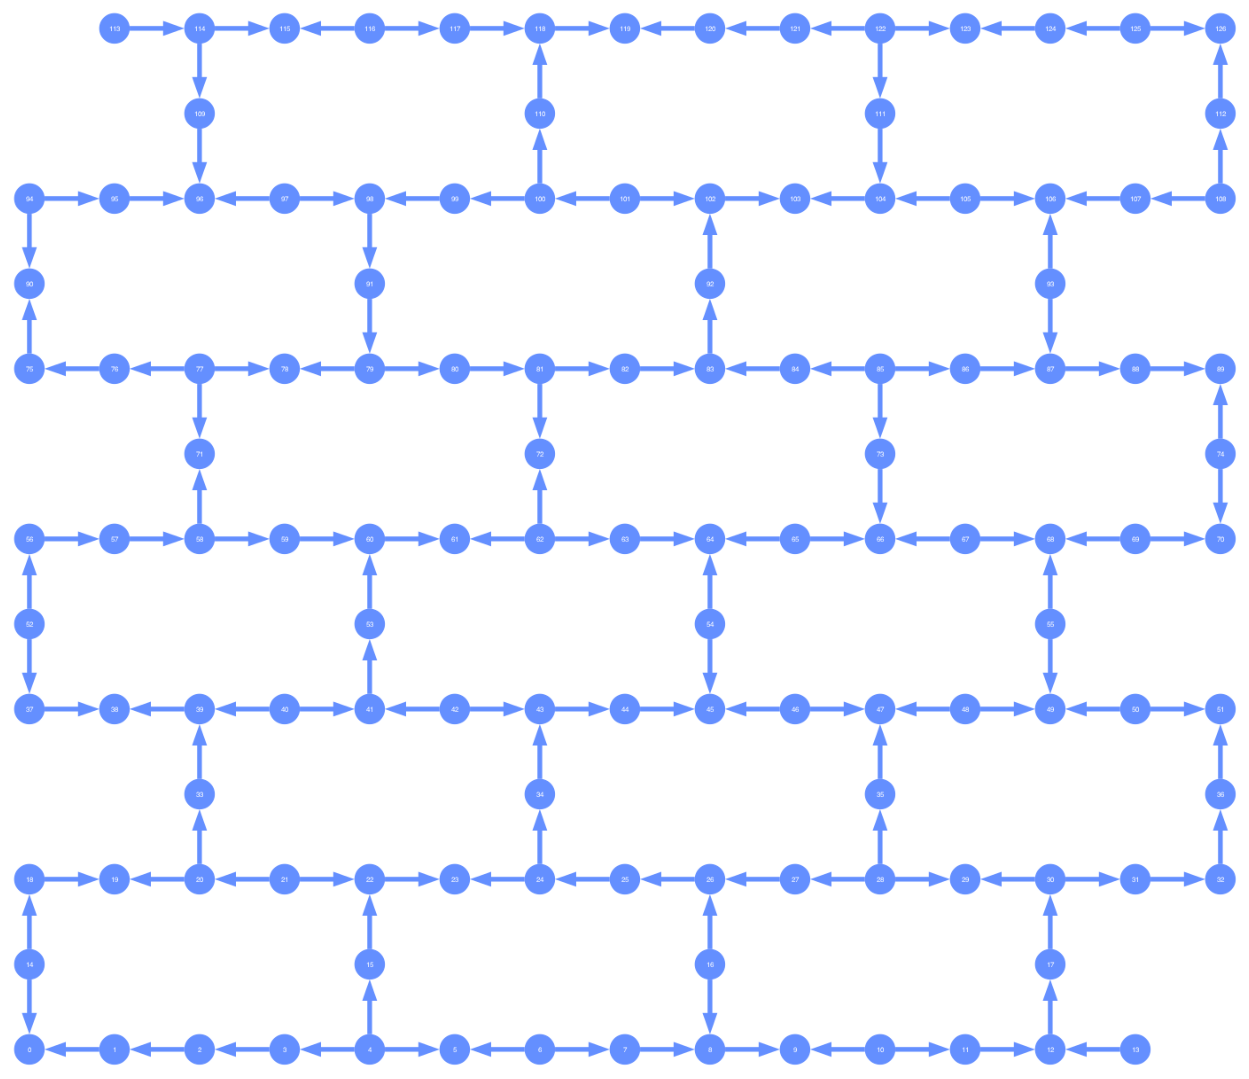

In [5]:
# Visualize the coupling directional map between the qubits 
plot_gate_map(backend_brisbane, plot_directed=True)


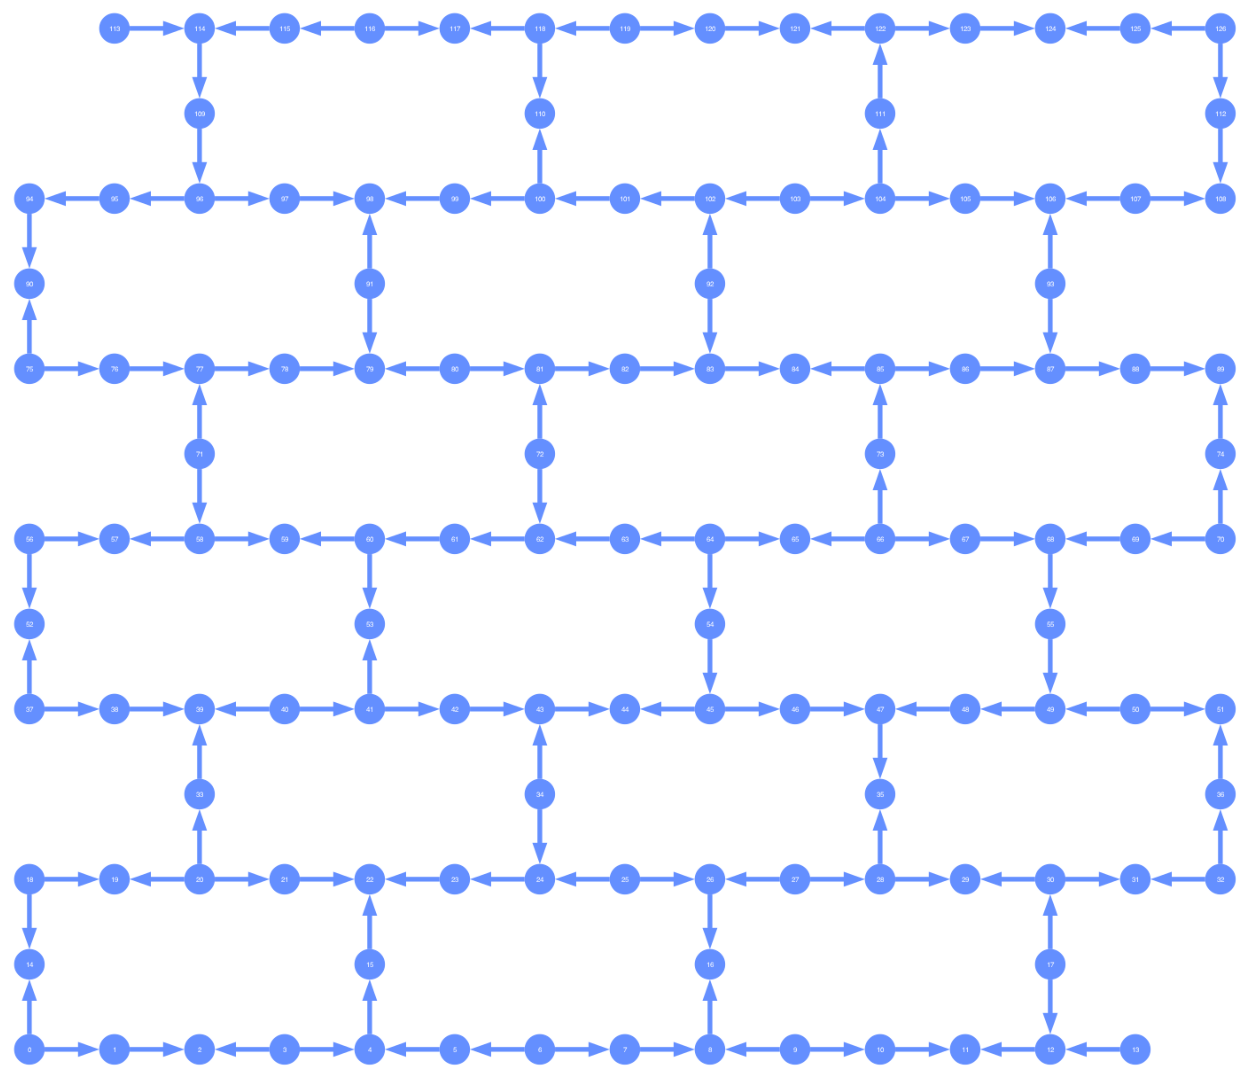

In [6]:
# Visualize the coupling directional map between the qubits 
plot_gate_map(backend_nazca, plot_directed=True)


In [7]:
# Quantum circuit with a single and multi-qubit gates
qc = QuantumCircuit(4)
qc.h(0)
qc.cx(0,1)
qc.cx(0,2)
qc.cx(0,3)
circuit_drawer(qc)


┌───┐               
q_0: ┤ H ├──■────■────■──
     └───┘┌─┴─┐  │    │  
q_1: ─────┤ X ├──┼────┼──
          └───┘┌─┴─┐  │  
q_2: ──────────┤ X ├──┼──
               └───┘┌─┴─┐
q_3: ───────────────┤ X ├
                    └───┘

Depth: 64


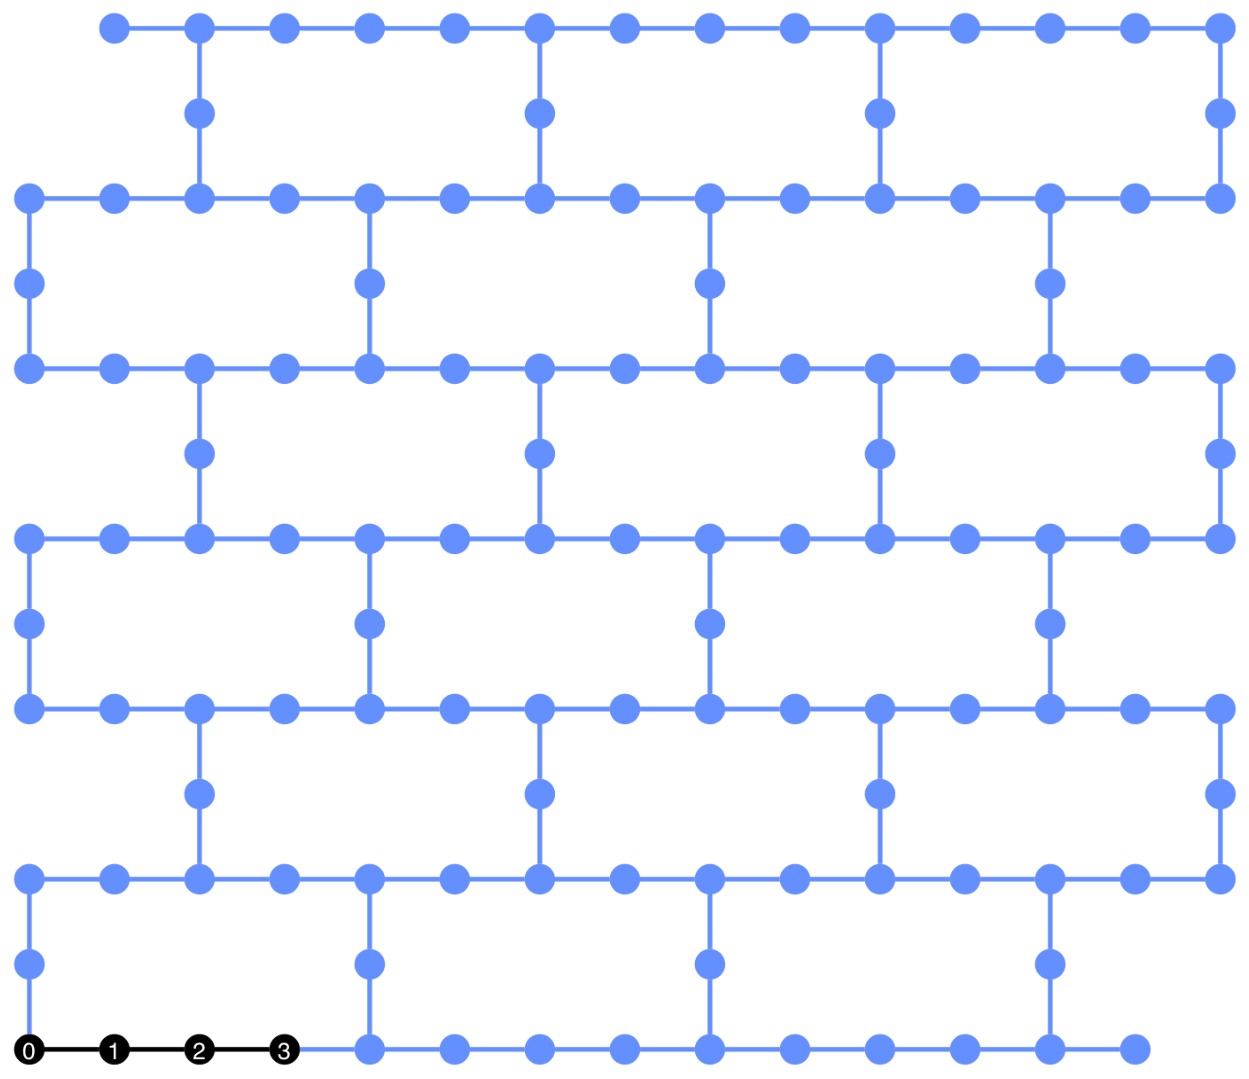

In [8]:
# Generate a preset pass manager:
pass_manager = generate_preset_pass_manager(backend=backend_brisbane, optimization_level=0)

# Transpile the circuit with the optimization level = 0
qc_brisbane_0 = pass_manager.run(qc)

# Print out the depth of the circuit
print('Depth:', qc_brisbane_0.depth())
# Plot the resulting layout of the quantum circuit after Layout
plot_circuit_layout(qc_brisbane_0, backend_brisbane)


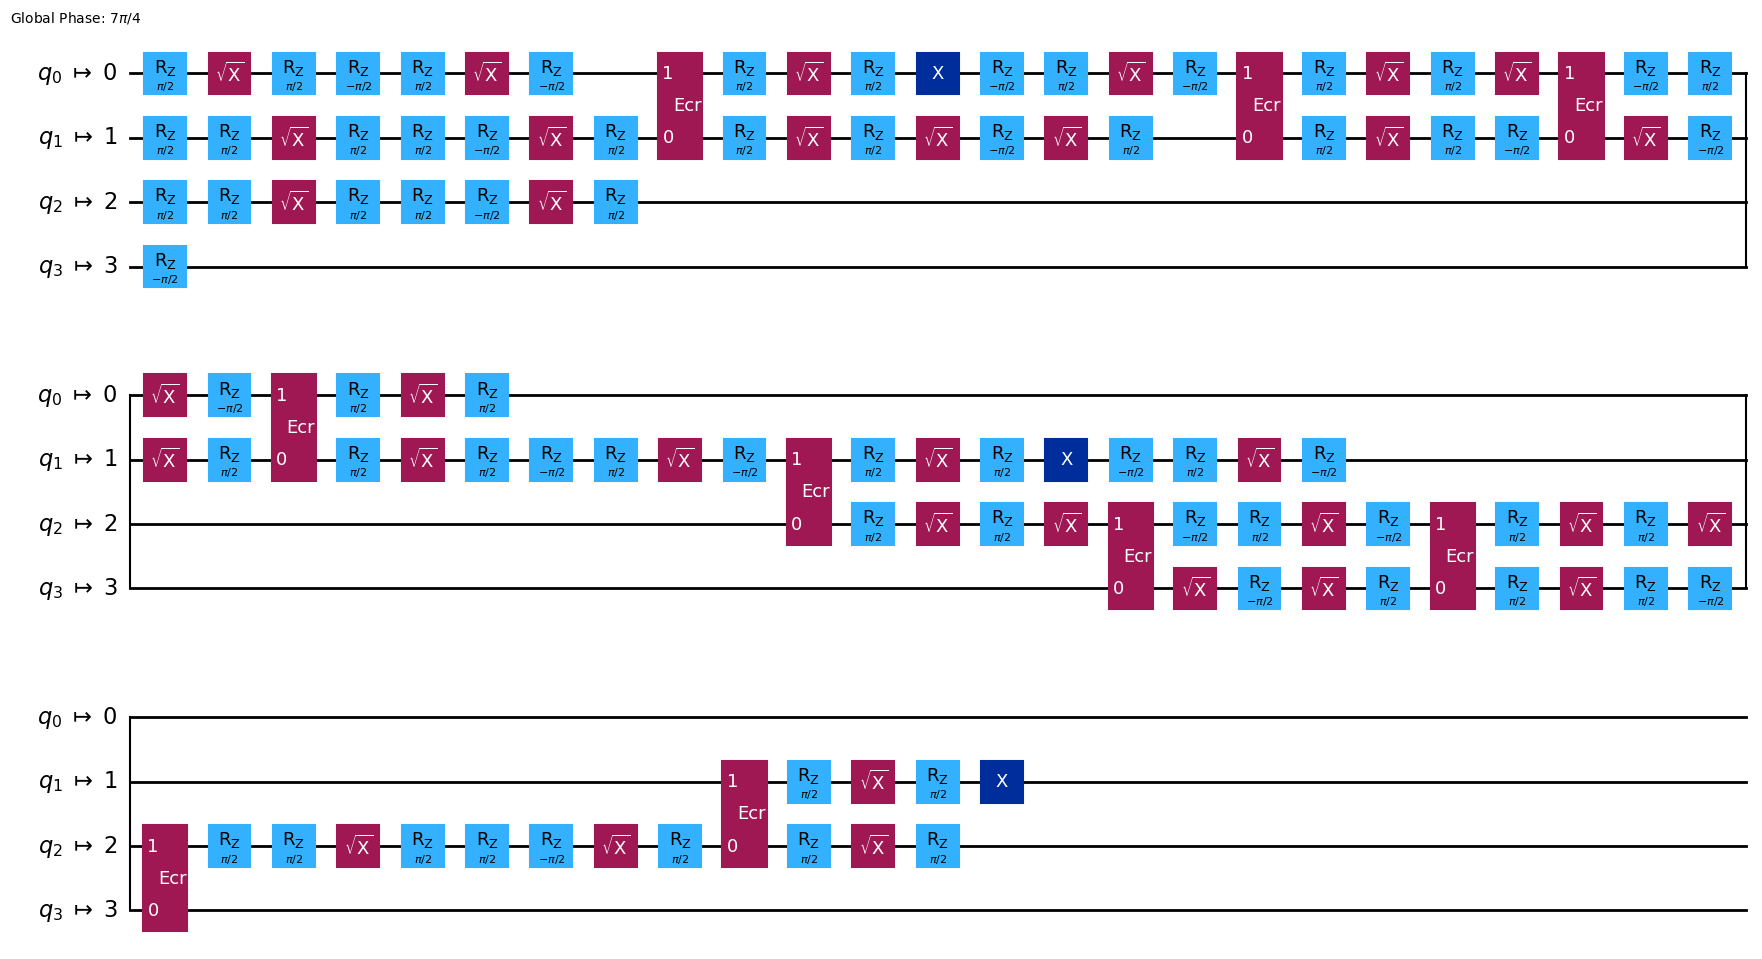

In [9]:
circuit_drawer(qc_brisbane_0, idle_wires=False, output='mpl')

Depth: 40


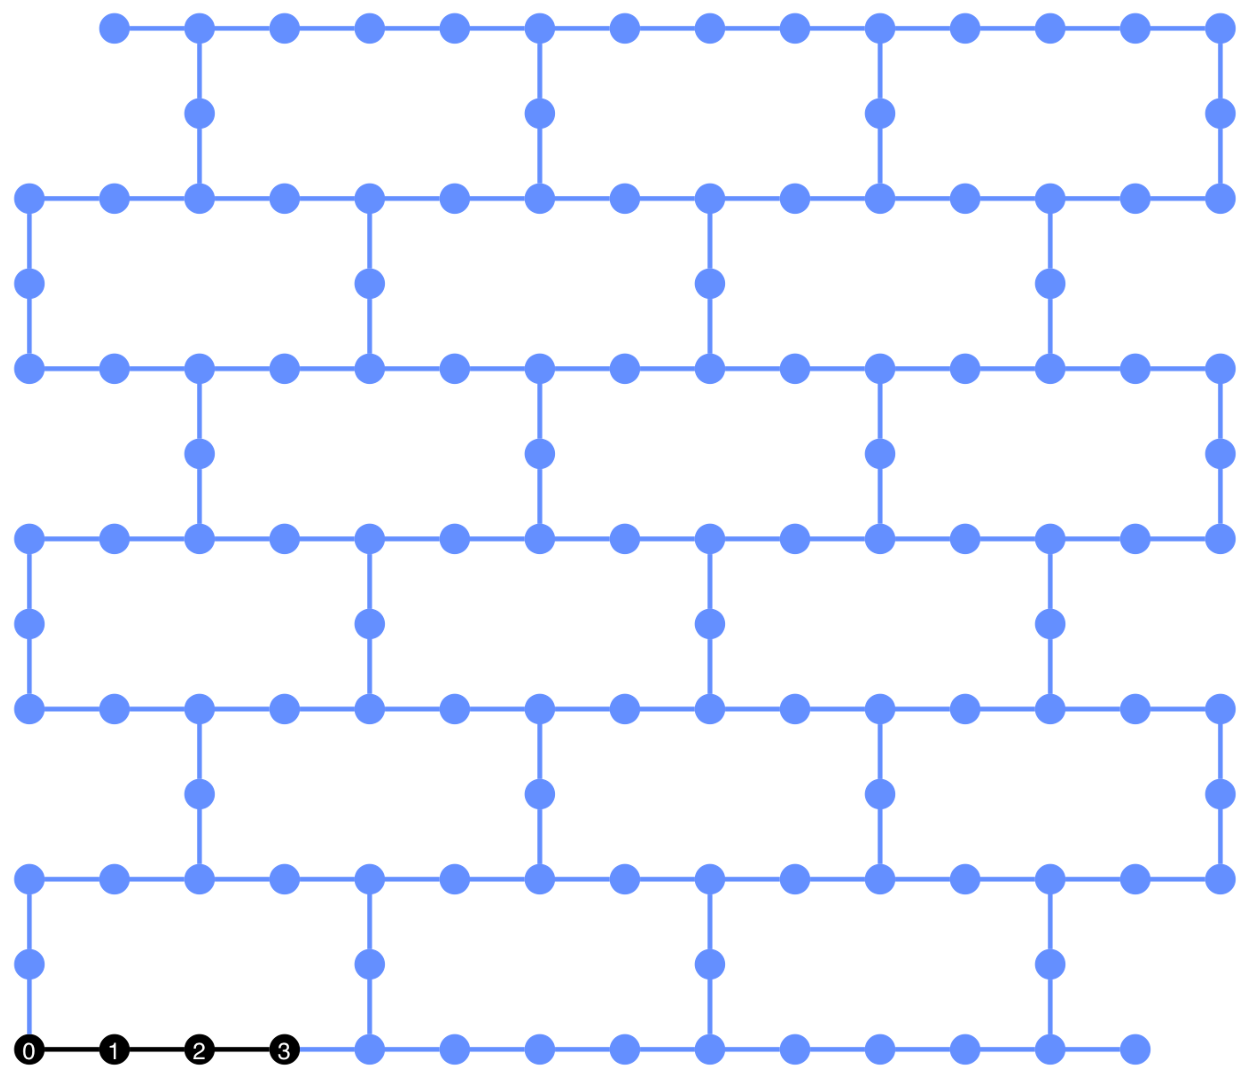

In [10]:
# Generate a preset pass manager:
pass_manager = generate_preset_pass_manager(backend=backend_nazca, optimization_level=0)

# Transpile the circuit with the optimization level = 0
qc_nazca_0 = pass_manager.run(qc)

print('Depth:', qc_nazca_0.depth())
plot_circuit_layout(qc_nazca_0, backend_nazca)


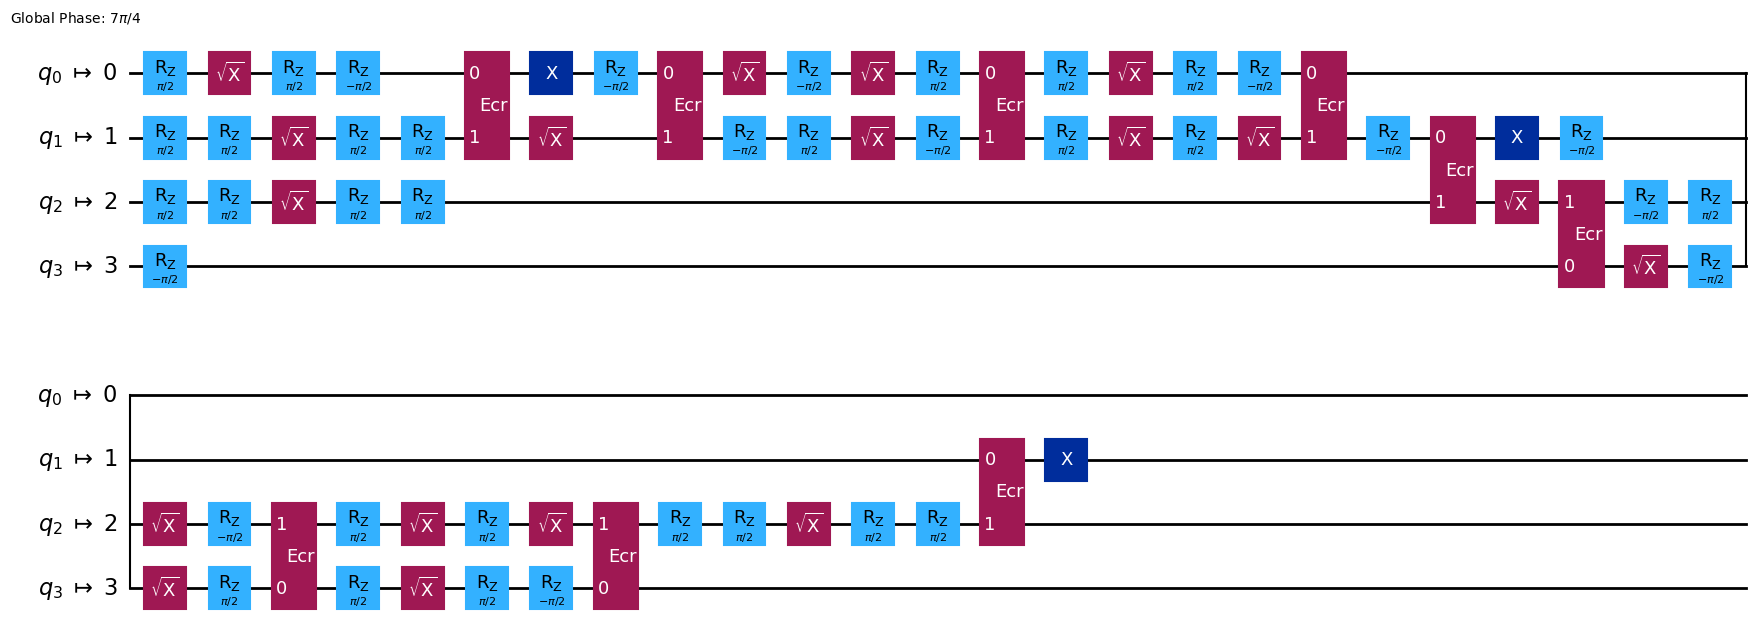

In [11]:
circuit_drawer(qc_nazca_0, idle_wires=False, output='mpl')

In [12]:
pass_manager = generate_preset_pass_manager(backend=backend_brisbane, optimization_level=3)
qc_transpiled_brisbane = pass_manager.run(qc)

Depth: 15
Ops count:  OrderedDict([('rz', 18), ('sx', 10), ('ecr', 3), ('x', 1)])


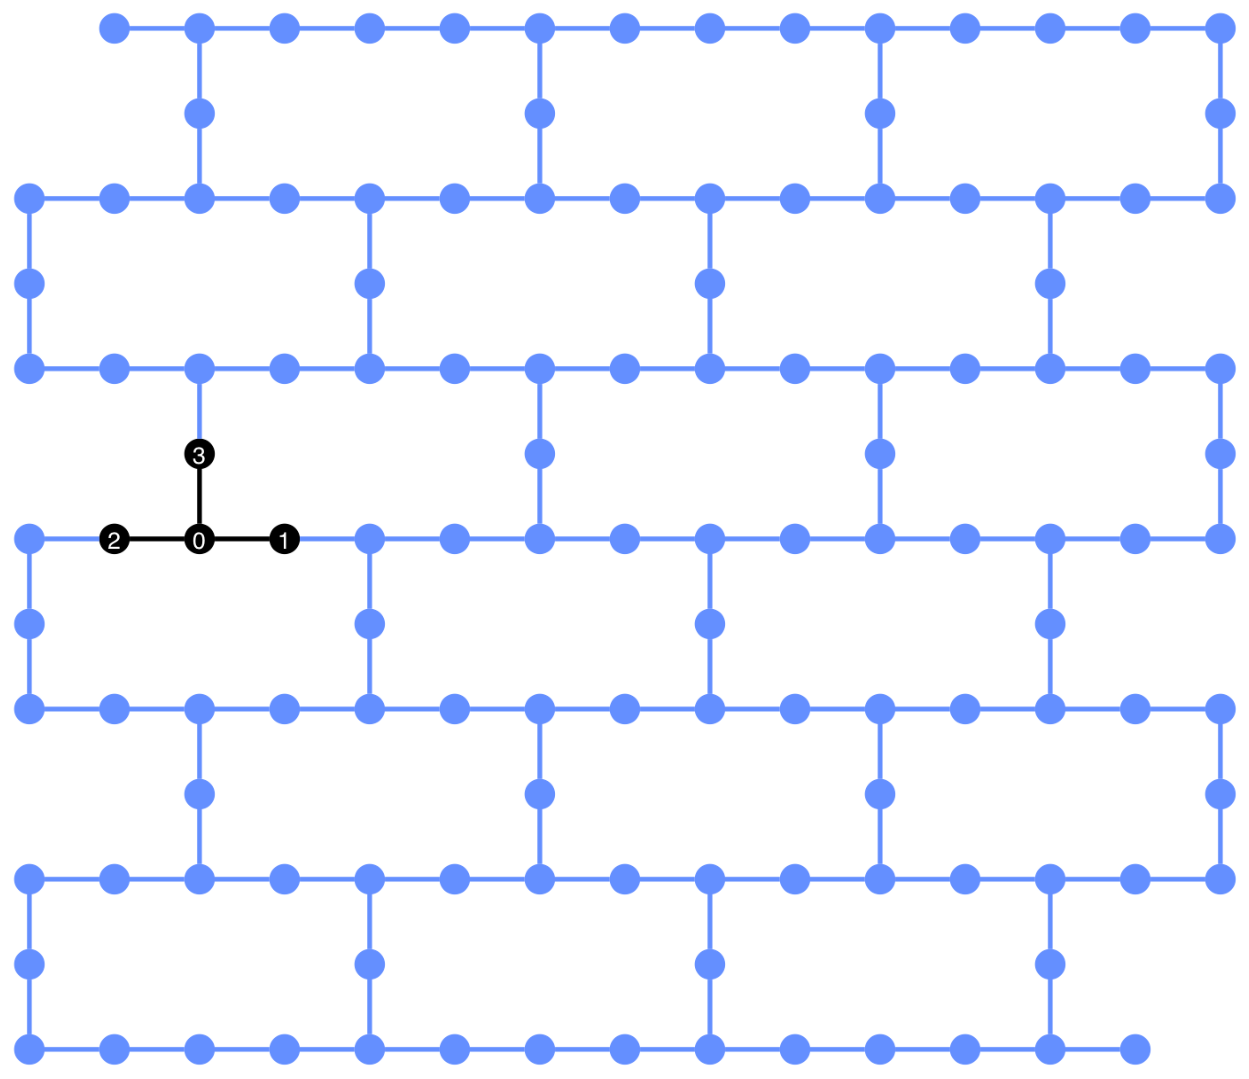

In [13]:
# Get the depth and operation count of the transpiled circuit. 
print('Depth:', qc_transpiled_brisbane.depth())
print('Ops count: ', qc_transpiled_brisbane.count_ops())
# Print the circuit layout
plot_circuit_layout(qc_transpiled_brisbane, backend_brisbane)

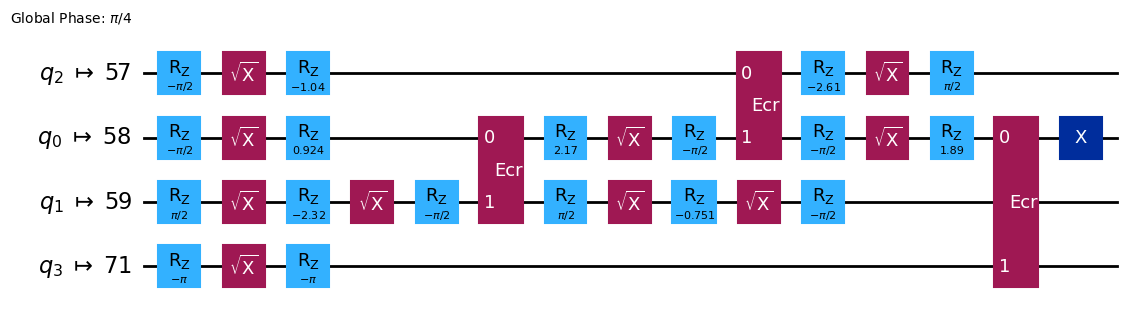

In [14]:
# Redraw the transpiled circuit at new level
circuit_drawer(qc_transpiled_brisbane, idle_wires=False, output='mpl')


Depth: 19
Ops count:  OrderedDict([('rz', 23), ('sx', 13), ('ecr', 3)])


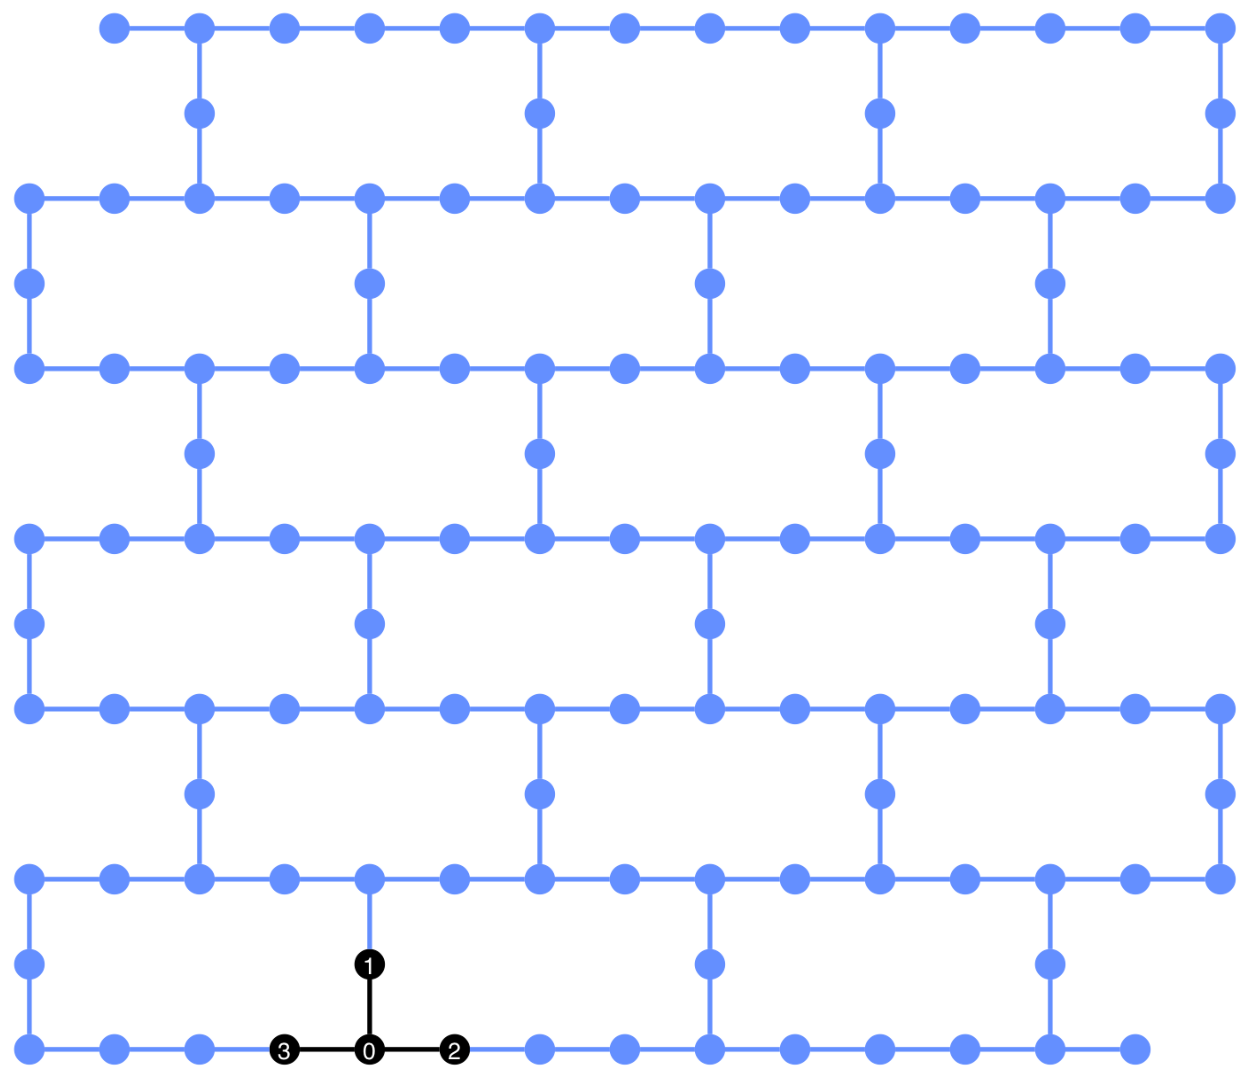

In [15]:
# Generate a preset pass manager for Nazca:
pass_manager = generate_preset_pass_manager(backend=backend_nazca, optimization_level=3)

# Transpile the circuit with the optimization level = 3
qc_transpiled_nazca= pass_manager.run(qc)

# Get the depth and operation count of the transpiled circuit. 
print('Depth:', qc_transpiled_nazca.depth())
print('Ops count: ', qc_transpiled_nazca.count_ops())
# Print the circuit layout
plot_circuit_layout(qc_transpiled_nazca, backend_nazca)


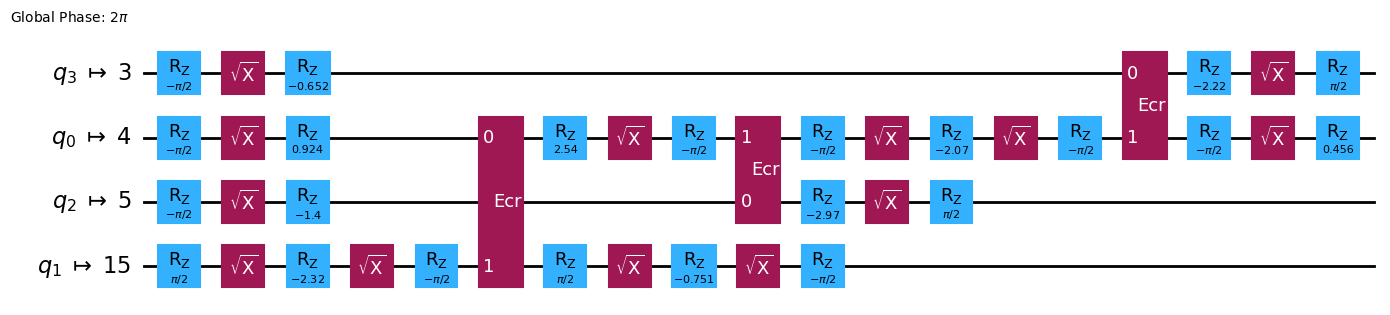

In [16]:
circuit_drawer(qc_transpiled_nazca, idle_wires=False, output='mpl')

In [17]:
# Set the brisbane backend device t obtain configuration information
backend = service.get_backend('ibm_brisbane')
backend


<IBMBackend('ibm_brisbane')>

In [18]:
# Extract the coupling map from the backend
ibm_brisbane_coupling_map = backend.configuration().coupling_map
# List out the extracted coupling map
ibm_brisbane_coupling_map


[[1, 0],
 [2, 1],
 [3, 2],
 [4, 3],
 [4, 5],
 [4, 15],
 [6, 5],
 [6, 7],
 [7, 8],
 [8, 9],
 [10, 9],
 [10, 11],
 [11, 12],
 [12, 17],
 [13, 12],
 [14, 0],
 [14, 18],
 [15, 22],
 [16, 8],
 [16, 26],
 [17, 30],
 [18, 19],
 [20, 19],
 [20, 33],
 [21, 20],
 [21, 22],
 [22, 23],
 [24, 23],
 [24, 34],
 [25, 24],
 [26, 25],
 [27, 26],
 [28, 27],
 [28, 29],
 [28, 35],
 [30, 29],
 [30, 31],
 [31, 32],
 [32, 36],
 [33, 39],
 [34, 43],
 [35, 47],
 [36, 51],
 [37, 38],
 [39, 38],
 [40, 39],
 [40, 41],
 [41, 53],
 [42, 41],
 [42, 43],
 [43, 44],
 [44, 45],
 [46, 45],
 [46, 47],
 [48, 47],
 [48, 49],
 [50, 49],
 [50, 51],
 [52, 37],
 [52, 56],
 [53, 60],
 [54, 45],
 [54, 64],
 [55, 49],
 [55, 68],
 [56, 57],
 [57, 58],
 [58, 59],
 [58, 71],
 [59, 60],
 [60, 61],
 [62, 61],
 [62, 63],
 [62, 72],
 [63, 64],
 [65, 64],
 [65, 66],
 [67, 66],
 [67, 68],
 [69, 68],
 [69, 70],
 [73, 66],
 [74, 70],
 [74, 89],
 [75, 90],
 [76, 75],
 [77, 71],
 [77, 76],
 [77, 78],
 [79, 78],
 [79, 80],
 [80, 81],
 [81, 72],

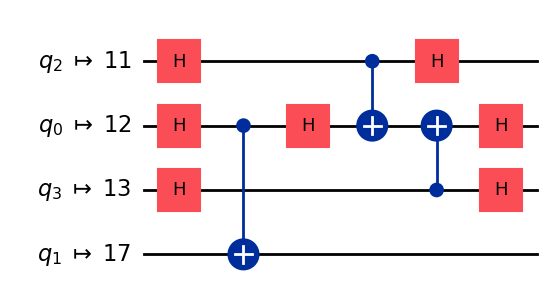

In [19]:
# Transpile the a custom circuit using only the coupling map. 
# Set the backend to None so it will force using the coupling map provided.
pass_manager = generate_preset_pass_manager(backend=None, optimization_level = 3, coupling_map=ibm_brisbane_coupling_map)
qc_custom= pass_manager.run(qc)

# Draw the resulting custom topology circuit.
circuit_drawer(qc_custom, idle_wires=False, output='mpl')


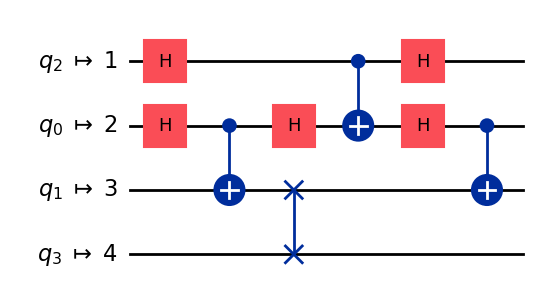

In [20]:
# Create our own coupling map (custom topology)
custom_linear_topology = [[0,1],[1,2],[2,3],[3,4]]

# Set the coupling map to our custom linear topology
#qc_custom = transpile(qc, backend=None, coupling_map=custom_linear_topology)
pass_manager = generate_preset_pass_manager(backend=None, optimization_level = 3, coupling_map=custom_linear_topology)
qc_custom= pass_manager.run(qc)

# Draw the resulting circuit.
circuit_drawer(qc_custom, idle_wires=False, output='mpl')


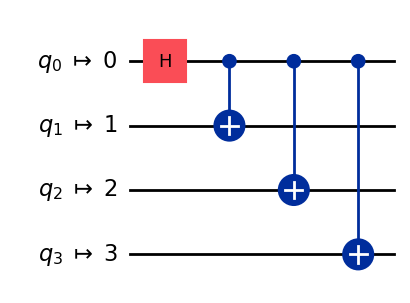

In [21]:
# Import the PassManager and a few Passes
from qiskit.transpiler import PassManager, CouplingMap
from qiskit.transpiler.passes import TrivialLayout, BasicSwap
pm = PassManager()

# Create a TrivialLayout based on the ibm_brisbane coupling map
trivial = TrivialLayout(CouplingMap(ibm_brisbane_coupling_map))
# Append the TrivialLayout to the PassManager
pm.append(trivial)
# Run the PassManager and draw the resulting circuit
tv_qc = pm.run(qc)
circuit_drawer(tv_qc, idle_wires=False, output='mpl')


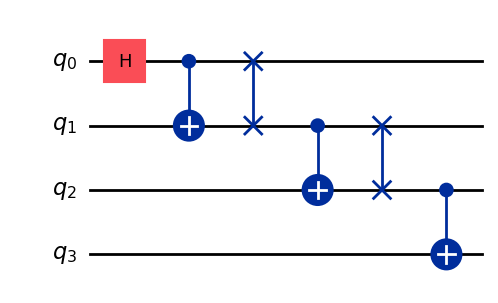

In [22]:
# Create a BasicSwap based on the ibm_brisbane coupling map we used earlier
basic_swap = BasicSwap(CouplingMap(ibm_brisbane_coupling_map))
#Add the BasicSwap to the PassManager
pm = PassManager(basic_swap)
# Run the PassManager and draw the results
new_qc = pm.run(qc)
circuit_drawer(new_qc, idle_wires=False, output='mpl')


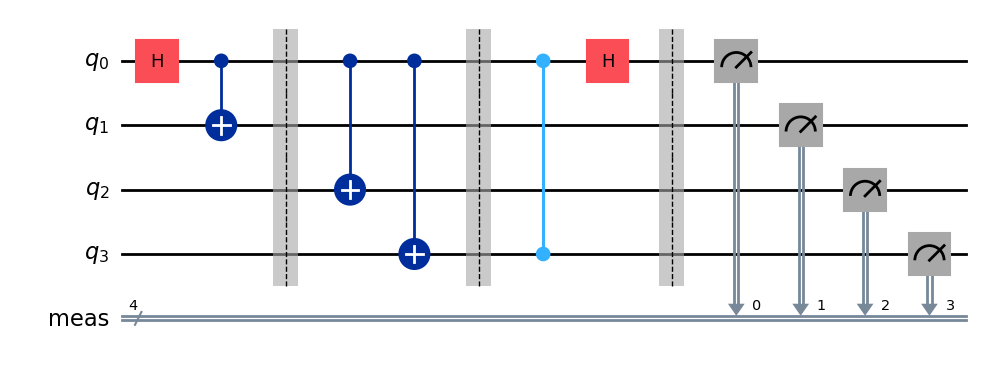

In [23]:
# Sample quantum circuit 
qc = QuantumCircuit(4)
qc.h(0)
qc.cx(0,1)
qc.barrier()
qc.cx(0,2)
qc.cx(0,3)
qc.barrier()
qc.cz(3,0)
qc.h(0)
qc.measure_all()
# Draw the circuit using the default renderer
circuit_drawer(qc, output='mpl')


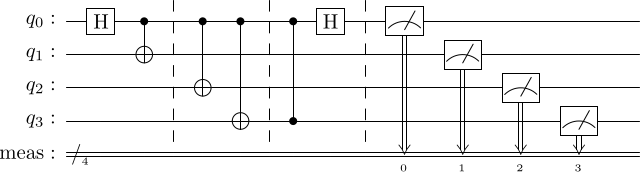

In [24]:
circuit_drawer(qc, output='latex')

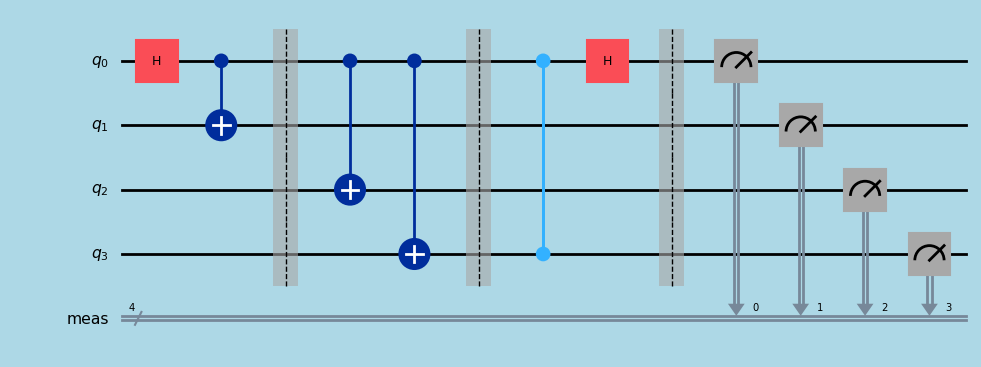

In [25]:
# Define the style to render the circuit and components
style = {'backgroundcolor': 'lightblue','gatefacecolor': 'white', 'gatetextcolor': 'black', 'fontsize': 9}
# Draw the mpl with the specified style
circuit_drawer(qc, style=style, output='mpl')


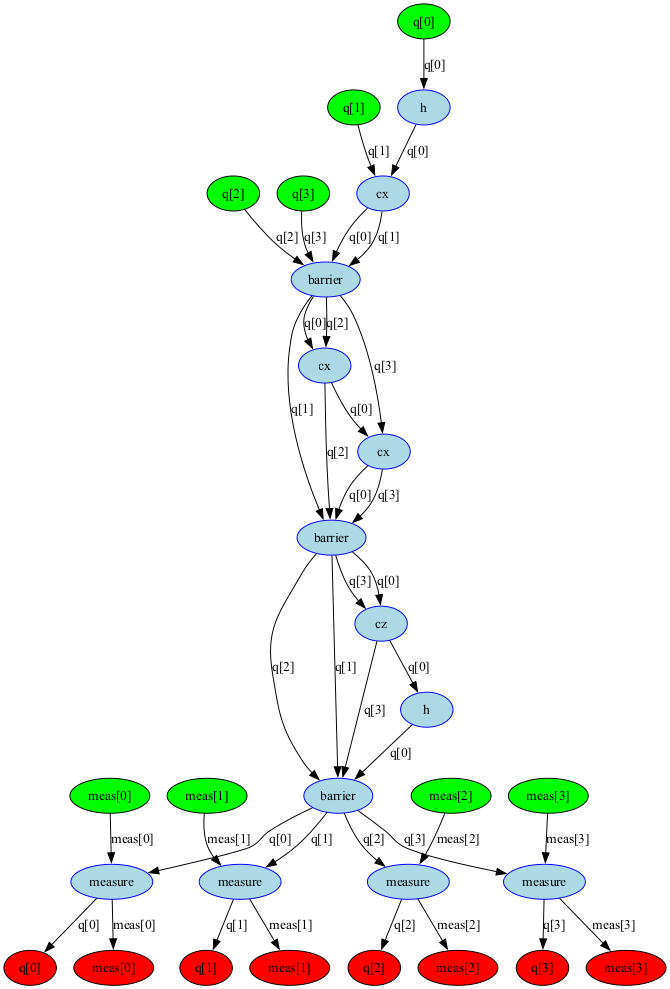

In [26]:
# Import the Circuit to DAG converter
from qiskit.converters import circuit_to_dag
# Import the DAG drawer
from qiskit.visualization import dag_drawer
# Convert the circuit into a DAG
dag = circuit_to_dag(qc)
# Draw the DAG of the circuit
dag_drawer(dag)
